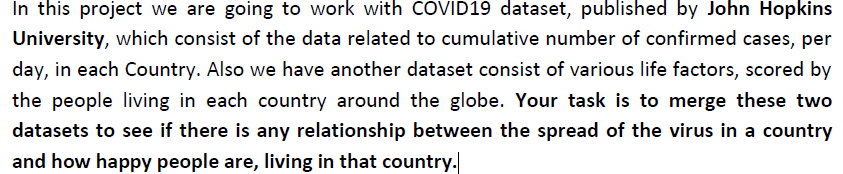

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium 

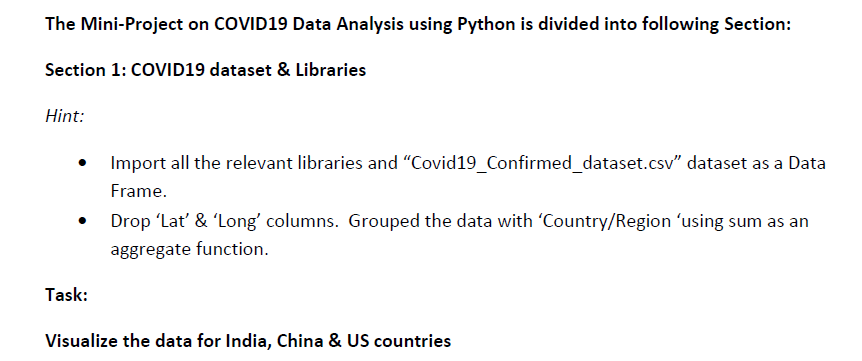

In [2]:
corona =  pd.read_csv('time_series_covid_19_confirmed.csv')
corona.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762


In [3]:
corona.drop(['Lat','Long'],axis = 1, inplace=True)

In [4]:
corona.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,NaN,Albania,0,0,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762


In [5]:
corona_aggregated = corona.groupby('Country/Region').sum()

In [6]:
corona_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
Albania,0,0,0,0,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
Algeria,0,0,0,0,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
Andorra,0,0,0,0,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
Angola,0,0,0,0,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,12541,12770,13065,13398,13722,13928,14208,14510,14875,15184
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
Yemen,0,0,0,0,0,0,0,0,0,0,...,1734,1760,1763,1768,1796,1797,1804,1832,1831,1841


In [7]:
corona_aggregated.loc['US']

1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
            ...   
8/8/20     4997929
8/9/20     5044864
8/10/20    5094400
8/11/20    5141208
8/12/20    5197118
Name: US, Length: 204, dtype: int64

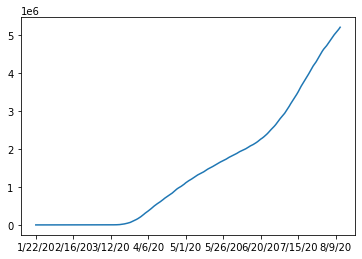

In [8]:
corona_aggregated.loc['US'].plot()

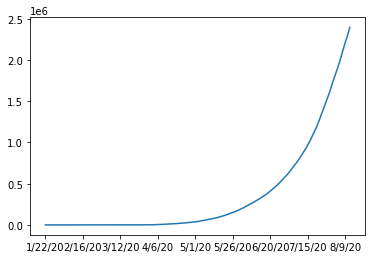

In [9]:
corona_aggregated.loc['India'].plot()

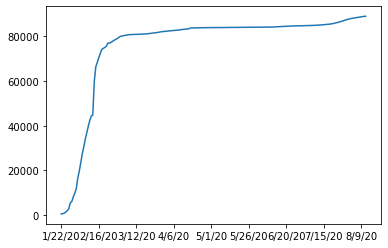

In [10]:
corona_aggregated.loc['China'].plot()

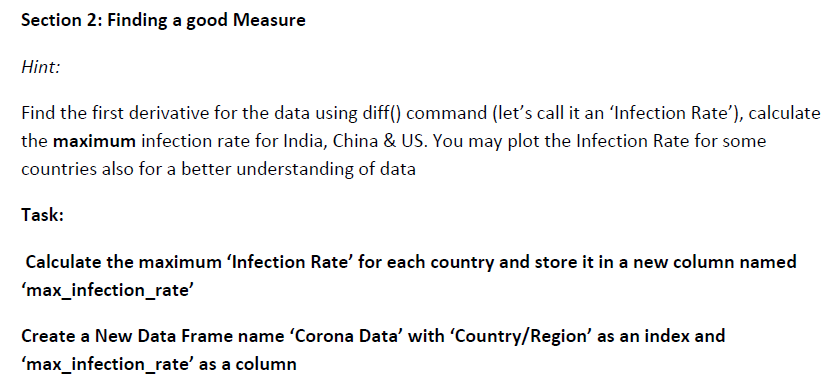

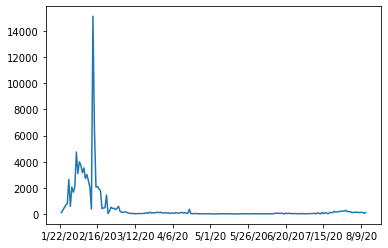

In [11]:
corona_aggregated.loc['China'].diff().plot();

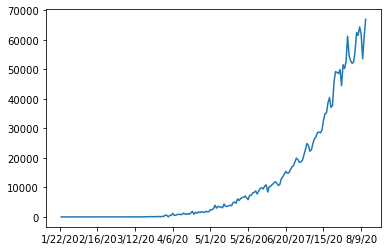

In [12]:
corona_aggregated.loc['India'].diff().plot();

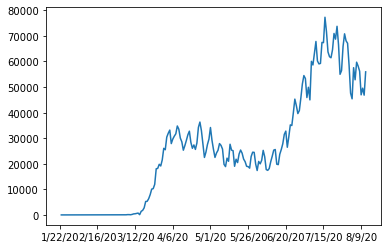

In [13]:
corona_aggregated.loc['US'].diff().plot();

In [14]:
corona_aggregated.loc['India'].diff().max()

66999.0

In [15]:
corona_aggregated.loc['US'].diff().max()

77255.0

In [16]:
corona_aggregated.shape

(188, 204)

In [17]:
max_infection_rates = []
for i in corona_aggregated.index:
    max_infection_rates.append(corona_aggregated.loc[i].diff().max())

In [18]:
max_infection_rates

[915.0,
 141.0,
 675.0,
 79.0,
 100.0,
 39.0,
 7663.0,
 771.0,
 716.0,
 1321.0,
 590.0,
 69.0,
 786.0,
 4019.0,
 12.0,
 973.0,
 2454.0,
 33.0,
 139.0,
 11.0,
 2036.0,
 811.0,
 262.0,
 69074.0,
 26.0,
 330.0,
 41.0,
 24.0,
 78.0,
 114.0,
 31.0,
 2324.0,
 2778.0,
 216.0,
 83.0,
 13990.0,
 15136.0,
 12830.0,
 44.0,
 346.0,
 414.0,
 1011.0,
 430.0,
 140.0,
 93.0,
 58.0,
 381.0,
 391.0,
 99.0,
 280.0,
 5.0,
 2012.0,
 11536.0,
 1774.0,
 449.0,
 1750.0,
 31.0,
 134.0,
 147.0,
 943.0,
 5.0,
 267.0,
 26849.0,
 570.0,
 173.0,
 42.0,
 6933.0,
 1513.0,
 235.0,
 6.0,
 4233.0,
 278.0,
 156.0,
 44.0,
 332.0,
 3.0,
 1075.0,
 210.0,
 99.0,
 66999.0,
 2657.0,
 3574.0,
 3484.0,
 1515.0,
 2308.0,
 6557.0,
 52.0,
 1762.0,
 40.0,
 18757.0,
 960.0,
 851.0,
 695.0,
 1073.0,
 11505.0,
 3.0,
 48.0,
 355.0,
 98.0,
 45.0,
 478.0,
 21.0,
 90.0,
 234.0,
 7.0,
 614.0,
 257.0,
 277.0,
 215.0,
 81.0,
 94.0,
 227.0,
 41.0,
 9556.0,
 478.0,
 12.0,
 56.0,
 678.0,
 1499.0,
 142.0,
 177.0,
 740.0,
 1346.0,
 89.0,
 480.0,
 

In [19]:
corona_aggregated['max_infection_rates'] = max_infection_rates

In [20]:
corona_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36782,36829,36896,37015,37054,37054,37162,37269,37345,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,5750,5889,6016,6151,6275,6411,6536,6676,6817,141.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,32504,33055,33626,34155,34693,35160,35712,36204,36699,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,939,939,944,955,955,955,963,963,977,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,1344,1395,1483,1538,1572,1672,1679,1735,1762,100.0


In [21]:
corona_data = pd.DataFrame(corona_aggregated['max_infection_rates'])

In [22]:
corona_data.head()

,max_infection_rates
Country/Region,
Afghanistan,915.0
Albania,141.0
Algeria,675.0
Andorra,79.0
Angola,100.0


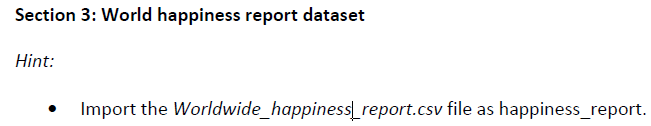

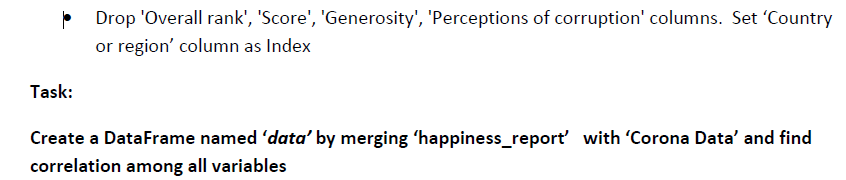

In [23]:
happiness_report = pd.read_csv('worldwide_happiness_report.csv')

In [24]:
happiness_report.head(5)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [25]:
happiness_report.drop(['Overall rank','Score','Generosity','Perceptions of corruption'],axis=1,inplace=True)

In [26]:
happiness_report.head(5)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [32]:
happiness_report.set_index('Country or region',inplace=True)

# Join

In [33]:
happiness_report.shape

(156, 4)

In [34]:
corona_data.shape

(188, 1)

In [35]:
data = corona_data.join(happiness_report,how ='inner')

In [36]:
data

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,141.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,7663.0,1.092,1.432,0.881,0.471
Armenia,771.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,1150.0,0.960,1.427,0.805,0.154
Vietnam,50.0,0.741,1.346,0.851,0.543
Yemen,116.0,0.287,1.163,0.463,0.143
Zambia,915.0,0.578,1.058,0.426,0.431


In [37]:
data[data.index=='India']

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
India,66999.0,0.755,0.765,0.588,0.498


In [39]:
data.corr()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.100475,0.067720,0.088250,0.088359
GDP per capita,0.100475,1.000000,0.757521,0.859431,0.394799
Social support,0.067720,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.088250,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.088359,0.394799,0.456317,0.423146,1.000000


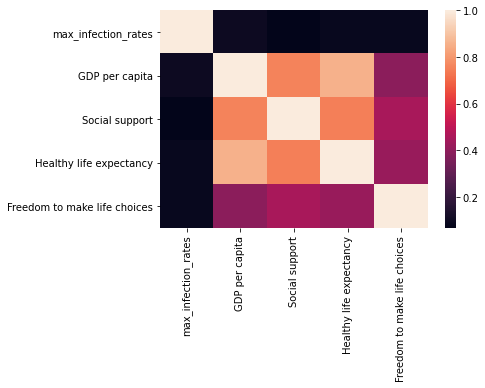

In [40]:
sns.heatmap(data.corr());

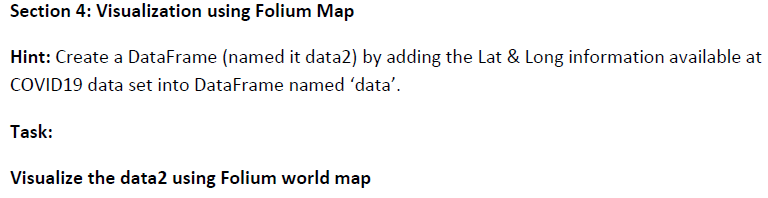

In [38]:
corona2 = pd.read_csv('time_series_covid_19_confirmed.csv')
corona2.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762


In [42]:
corona_countrywise = corona2.groupby('Country/Region').mean()
corona_countrywise

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.939110,67.709953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36747.0,36782.0,36829.0,36896.0,37015.0,37054.0,37054.0,37162.0,37269.0,37345.0
Albania,41.153300,20.168300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5620.0,5750.0,5889.0,6016.0,6151.0,6275.0,6411.0,6536.0,6676.0,6817.0
Algeria,28.033900,1.659600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31972.0,32504.0,33055.0,33626.0,34155.0,34693.0,35160.0,35712.0,36204.0,36699.0
Andorra,42.506300,1.521800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,937.0,939.0,939.0,944.0,955.0,955.0,955.0,963.0,963.0,977.0
Angola,-11.202700,17.873900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1280.0,1344.0,1395.0,1483.0,1538.0,1572.0,1672.0,1679.0,1735.0,1762.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12541.0,12770.0,13065.0,13398.0,13722.0,13928.0,14208.0,14510.0,14875.0,15184.0
Western Sahara,24.215500,-12.885800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
Yemen,15.552727,48.516388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1734.0,1760.0,1763.0,1768.0,1796.0,1797.0,1804.0,1832.0,1831.0,1841.0


In [43]:
corona_countrywise.loc['India']

Lat        2.059368e+01
Long       7.896288e+01
1/22/20    0.000000e+00
1/23/20    0.000000e+00
1/24/20    0.000000e+00
               ...     
8/8/20     2.153010e+06
8/9/20     2.215074e+06
8/10/20    2.268675e+06
8/11/20    2.329638e+06
8/12/20    2.396637e+06
Name: India, Length: 206, dtype: float64

In [44]:
corona2_data = pd.DataFrame(corona_countrywise['Lat'])
corona2_data.head()

,Lat
Country/Region,
Afghanistan,33.93911
Albania,41.15330
Algeria,28.03390
Andorra,42.50630
Angola,-11.20270


In [45]:
corona2_data['Long'] = corona_countrywise['Long']

In [46]:
corona2_data.head()

,Lat,Long
Country/Region,,
Afghanistan,33.93911,67.709953
Albania,41.15330,20.168300
Algeria,28.03390,1.659600
Andorra,42.50630,1.521800
Angola,-11.20270,17.873900


In [47]:
data2 = corona2_data.join(data,how ='inner')

In [48]:
data2.head()

,Lat,Long,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,33.93911,67.709953,915.0,0.350,0.517,0.361,0.000
Albania,41.15330,20.168300,141.0,0.947,0.848,0.874,0.383
Algeria,28.03390,1.659600,675.0,1.002,1.160,0.785,0.086
Argentina,-38.41610,-63.616700,7663.0,1.092,1.432,0.881,0.471
Armenia,40.06910,45.038200,771.0,0.850,1.055,0.815,0.283


In [50]:
world = folium.Map(tiles = 'cartodbpositron',zoom_start=4,max_zoom=7,min_zoom=0,height=500,width='80%')
world

In [56]:
for i in range(0,144):
    folium.Circle(
        location=[data2.iloc[i]['Lat'],data2.iloc[i]['Long']],
        tooltip = "<h4>"+data2.iloc[i].name+"</h4>"+
        "<li>Max_IR:"+str(data2.iloc[i]['max_infection_rates'])+"</li>"+
        "<li>GDP:"+str(data2.iloc[i]['GDP per capita'])+"</li>"+
        "<li>SS:"+str(data2.iloc[i]['Social support'])+"</li>"+
        "<li>HLI:"+str(data2.iloc[i]['Healthy life expectancy'])+"</li>"+
        "<li>FCL Rate:"+str(data2.iloc[i]['Freedom to make life choices'])+"</li>",
        
        radius = int(data2.iloc[i]['max_infection_rates']),
).add_to(world)
world

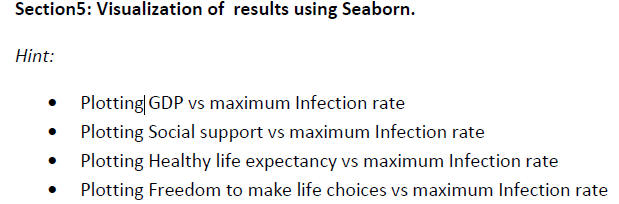

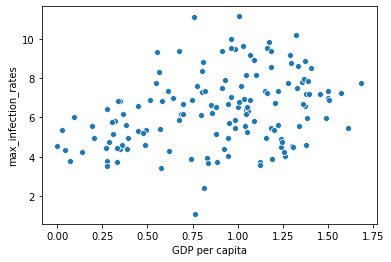

In [59]:
x = data2['GDP per capita']
y = data2['max_infection_rates']
sns.scatterplot(x,np.log(y));

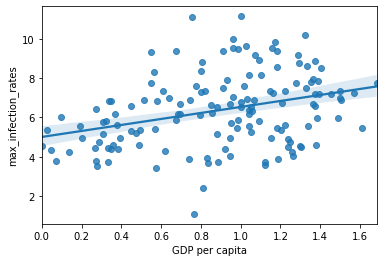

In [61]:
sns.regplot(x,np.log(y));